In [1]:
import acquire
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
new_or_used = 'all'
year = '2019,2018,2017,2016'
make = 'Ford'
model = 'F-150'
domain_list = ['mccombsfordwest.com', 'jordanford.net', 'southwayford.com', 'ancirakiasa.com', 'nsford.com',
               'worldcarkianorth.com', 
               'ancirachev.com', 'freedomchevy.com', 'mynschevy.com', 'anciracjd.com', 'northstardodge.net', 
               'sanantoniododgechryslerjeepram.com', 'ingramparkcj.net', 'lonestarchryslerdodgejeepsanantonio.com', 
               'northparktoyota.com', 'cavendertoyota.com', 'redmccombstoyota.com', 'universaltoyota.com']

In [3]:
dataframes_of_dealership_data = {}
for domain in domain_list:
    dataframes_of_dealership_data[f'{domain}'] = acquire.get_dealership_data(domain, new_or_used, year, make, model)
    print(f'Completed {domain}')
    
dataframes_of_dealership_data

https://www.mccombsfordwest.com/searchall.aspx?Year=2019,2018,2017,2016&Make=Ford&Model=F-150&pn=100
100
4
100
100
100
100
100
100
100
100
100
17
Completed mccombsfordwest.com
https://www.jordanford.net/searchall.aspx?Year=2019,2018,2017,2016&Make=Ford&Model=F-150&pn=100
100
4
100
100
100
100
100
100
100
100
100
11
Completed jordanford.net
https://www.southwayford.com/searchall.aspx?Year=2019,2018,2017,2016&Make=Ford&Model=F-150&pn=100
100
4
100
100
100
100
100
100
100
100
100
13
Completed southwayford.com
https://www.ancirakiasa.com/searchall.aspx?Year=2019,2018,2017,2016&Make=Ford&Model=F-150&pn=100
2
4
2
2
2
2
2
2
2
2
2
10
Completed ancirakiasa.com
https://www.nsford.com/searchall.aspx?Year=2019,2018,2017,2016&Make=Ford&Model=F-150&pn=100
100
4
100
100
100
100
100
100
100
100
100
14
Completed nsford.com
https://www.worldcarkianorth.com/searchall.aspx?Year=2019,2018,2017,2016&Make=Ford&Model=F-150&pn=100
0
4
0
0
0
0
0
0
0
0
0
19
Completed worldcarkianorth.com
https://www.ancirachev.c

{'mccombsfordwest.com':     year  make             model condition    price           body_style  \
 0   2019  Ford  F-150 King Ranch       new  $56,067      Crew Cab Pickup   
 1   2019  Ford      F-150 Lariat       new  $46,804  Extended Cab Pickup   
 2   2019  Ford          F-150 XL       new  $28,502      Crew Cab Pickup   
 3   2019  Ford          F-150 XL       new  $28,502      Crew Cab Pickup   
 4   2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 5   2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 6   2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 7   2019  Ford         F-150 STX       new  $32,482      Crew Cab Pickup   
 8   2019  Ford         F-150 STX       new  $32,482      Crew Cab Pickup   
 9   2019  Ford         F-150 STX       new  $48,252      Crew Cab Pickup   
 10  2019  Ford         F-150 STX       new  $32,482      Crew Cab Pickup   
 11  2019  Ford         F-150 STX       new  $32,482 

In [4]:
df = pd.concat(dataframes_of_dealership_data.values(), ignore_index=True)

In [5]:
df.head()

,year,make,model,condition,price,body_style,mileage,engine,transmission,drivetrain,ext_color,dealer
0,2019,Ford,F-150 King Ranch,new,"$56,067",Crew Cab Pickup,0,5.0L Ti-VCT V8 Engine with Auto Start/Stop Tec...,Automatic,RWD,Oxford White,McCombs Ford West
1,2019,Ford,F-150 Lariat,new,"$46,804",Extended Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magnetic Metallic,McCombs Ford West
2,2019,Ford,F-150 XL,new,"$28,502",Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
3,2019,Ford,F-150 XL,new,"$28,502",Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
4,2019,Ford,F-150 STX,new,"$28,502",Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West


In [6]:
df.dtypes

year            object
make            object
model           object
condition       object
price           object
body_style      object
mileage         object
engine          object
transmission    object
drivetrain      object
ext_color       object
dealer          object
dtype: object

In [7]:
df.year = df.year.astype('int')

In [8]:
df.price = df.price.str.replace('$', '').str.replace(',', '')

In [9]:
df.head()

,year,make,model,condition,price,body_style,mileage,engine,transmission,drivetrain,ext_color,dealer
0,2019,Ford,F-150 King Ranch,new,56067,Crew Cab Pickup,0,5.0L Ti-VCT V8 Engine with Auto Start/Stop Tec...,Automatic,RWD,Oxford White,McCombs Ford West
1,2019,Ford,F-150 Lariat,new,46804,Extended Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magnetic Metallic,McCombs Ford West
2,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
3,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
4,2019,Ford,F-150 STX,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West


In [10]:
df.mileage = df.mileage.astype('str').str.replace(',', '').astype('int')

In [11]:
df.head()

,year,make,model,condition,price,body_style,mileage,engine,transmission,drivetrain,ext_color,dealer
0,2019,Ford,F-150 King Ranch,new,56067,Crew Cab Pickup,0,5.0L Ti-VCT V8 Engine with Auto Start/Stop Tec...,Automatic,RWD,Oxford White,McCombs Ford West
1,2019,Ford,F-150 Lariat,new,46804,Extended Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magnetic Metallic,McCombs Ford West
2,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
3,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
4,2019,Ford,F-150 STX,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West


In [12]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [13]:
df = df[df.price.apply(is_number)]

In [14]:
df.price = df.price.astype('int')

In [15]:
df.dtypes

year             int32
make            object
model           object
condition       object
price            int32
body_style      object
mileage          int32
engine          object
transmission    object
drivetrain      object
ext_color       object
dealer          object
dtype: object

In [16]:
df.model.value_counts()

F-150 XLT                              158
F-150 XL                                58
F-150 Raptor                            40
F-150 STX                               39
F-150 LARIAT                            37
F-150 XL STX Appearance Package         24
F-150 Lariat                            14
F-150 King Ranch                        13
F-150 King Ranch®                        8
F-150 Limited                            3
F-150                                    3
F-150 Platinum                           2
F-150 ROUSH                              1
F-150 Raptor Shelby Baja Raptor Pkg      1
Name: model, dtype: int64

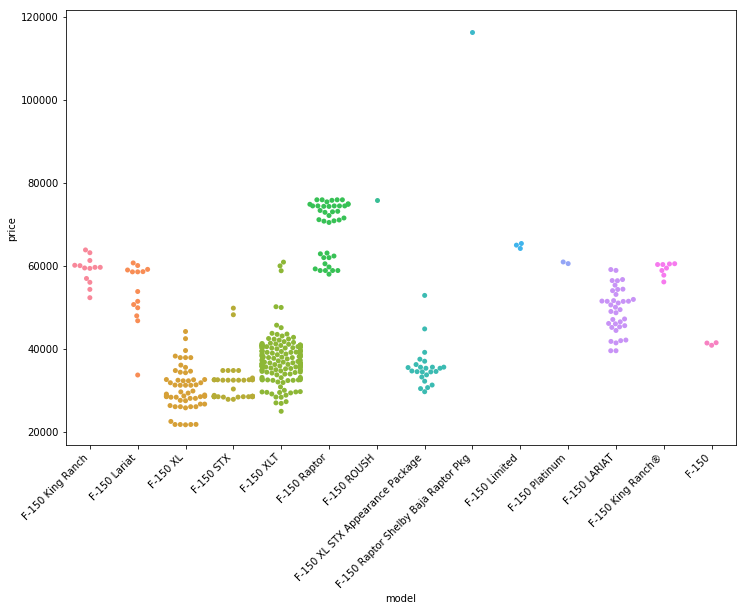

In [17]:
plt.figure(figsize=(12, 8))
sns.swarmplot(df.model, df.price)
plt.xticks(rotation=45, ha='right')
plt.show()

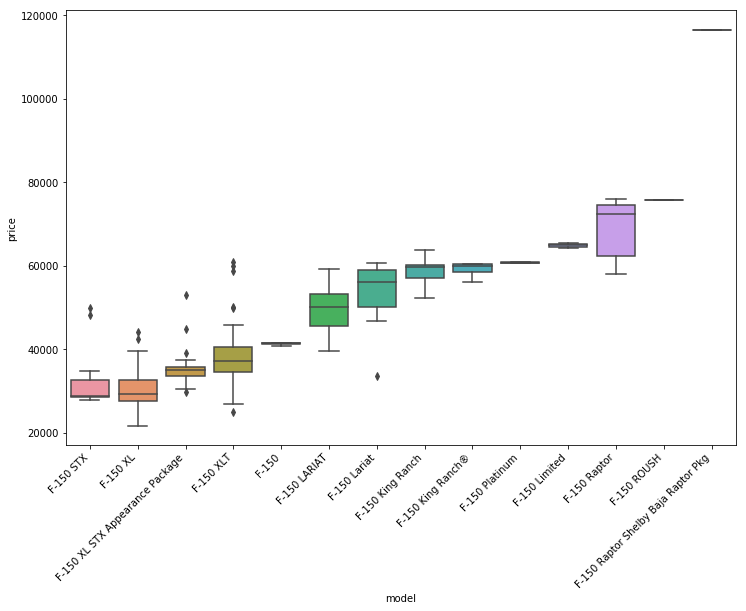

In [18]:
plt.figure(figsize=(12,8))

grouped = df.groupby('model')
df2 = pd.DataFrame({col:vals['price'] for col,vals in grouped})

meds = df2.median()
meds = meds.sort_values(ascending=True)

sns.boxplot(df.model, df.price, order=meds.index)
plt.xticks(rotation=45, ha='right')
plt.show()

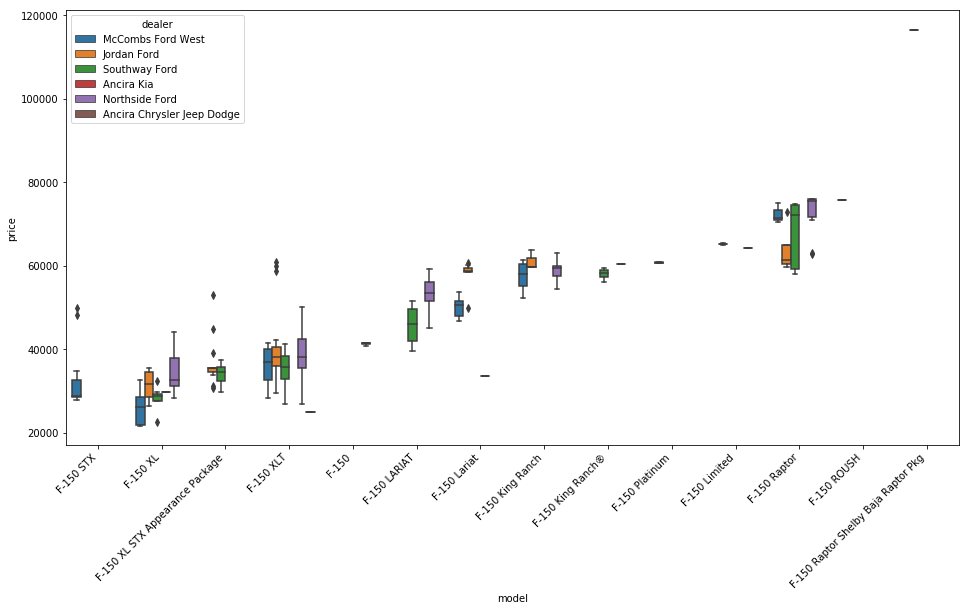

In [19]:
plt.figure(figsize=(16, 8))

grouped = df.groupby('model')
df2 = pd.DataFrame({col:vals['price'] for col,vals in grouped})

meds = df2.median()
meds = meds.sort_values(ascending=True)

sns.boxplot(df.model, df.price, order=meds.index, hue=df.dealer)
plt.xticks(rotation=45, ha='right')
plt.show()

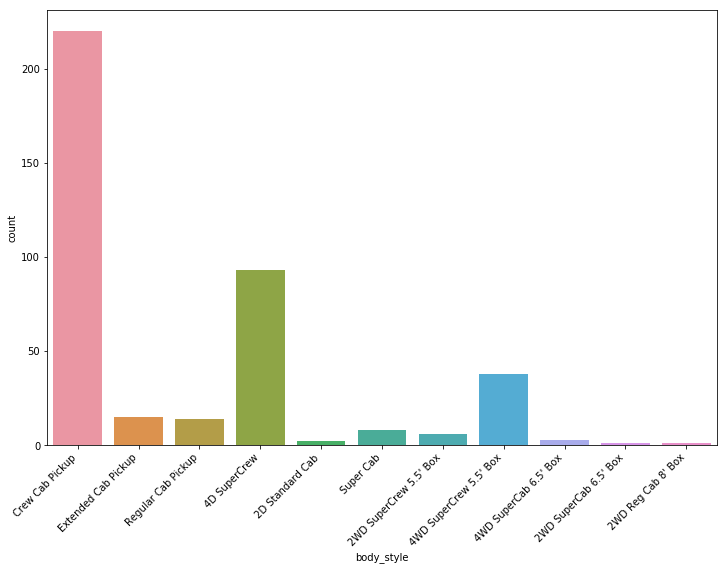

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(df.body_style)
plt.xticks(rotation=45, ha='right')
plt.show()

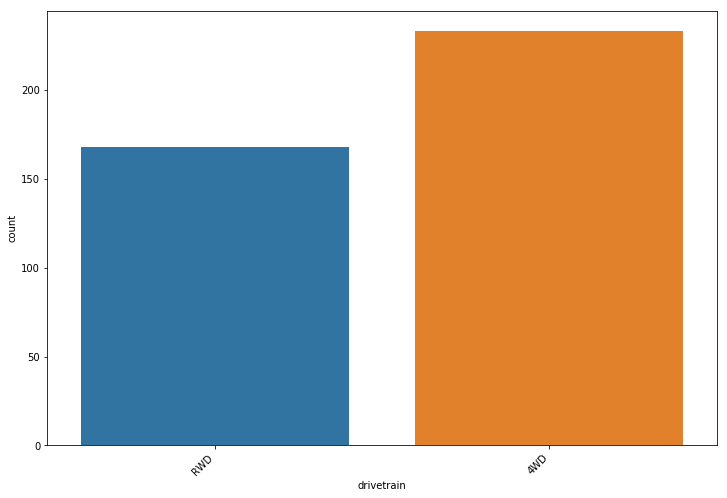

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(df.drivetrain)
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
df[df.price == df.price.min()].to_dict('r')

[{'year': 2019,
  'make': 'Ford',
  'model': 'F-150 XL',
  'condition': 'new',
  'price': 21734,
  'body_style': 'Regular Cab Pickup',
  'mileage': 0,
  'engine': '3.3L Ti-VCT V6 Engine with Auto Start/Stop Technology',
  'transmission': 'Automatic',
  'drivetrain': 'RWD',
  'ext_color': 'Oxford White',
  'dealer': 'McCombs Ford West'}]

In [23]:
df.groupby(['model', 'condition', 'dealer']).price.describe().sort_values(by='50%')

count  \
model                               condition dealer                              
F-150 XLT                           used      Ancira Chrysler Jeep Dodge    1.0   
F-150 XL                            new       McCombs Ford West            17.0   
F-150 STX                           new       McCombs Ford West            39.0   
F-150 XL                            new       Southway Ford                 9.0   
                                    used      Ancira Kia                    1.0   
                                              Northside Ford                1.0   
                                    new       Jordan Ford                  12.0   
                                              Northside Ford               18.0   
F-150 Lariat                        used      Ancira Kia                    1.0   
F-150 XL STX Appearance Package     new       Southway Ford                10.0   
                                              Jordan Ford                  14.0   
F-150 XLT                           new       Southway Ford                36.0   
                                    used      McCombs Ford West             1.0   
                                    new       McCombs Ford West            28.0   
                                              Jordan Ford                  54.0   
                                              Northside Ford               38.0   
F-150                               new       Northside Ford                3.0   
F-150 LARIAT                        new       Southway Ford                19.0   
F-150 Lariat                        used      McCombs Ford West             1.0   
                                    new       McCombs Ford West             4.0   
F-150 LARIAT                        new       Northside Ford               18.0   
F-150 King Ranch                    new       McCombs Ford West             4.0   
F-150 King Ranch®                   new       Southway Ford                 4.0   
F-150 Lariat                        new       Jordan Ford                   8.0   
F-150 King Ranch                    new       Northside Ford                6.0   
                                              Jordan Ford                   3.0   
F-150 King Ranch®                   new       Northside Ford                4.0   
F-150 Platinum                      new       Jordan Ford                   2.0   
F-150 Raptor                        new       Jordan Ford                   4.0   
F-150 Limited                       new       Northside Ford                1.0   
                                              Jordan Ford                   2.0   
F-150 Raptor                        new       McCombs Ford West             5.0   
                                              Southway Ford                20.0   
                                              Northside Ford               11.0   
F-150 ROUSH                         new       McCombs Ford West             1.0   
F-150 Raptor Shelby Baja Raptor Pkg new       Jordan Ford                   1.0   

                                                                                   mean  \
model                               condition dealer                                      
F-150 XLT                           used      Ancira Chrysler Jeep Dodge   24988.000000   
F-150 XL                            new       McCombs Ford West            26005.529412   
F-150 STX                           new       McCombs Ford West            31493.717949   
F-150 XL                            new       Southway Ford                28440.000000   
                                    used      Ancira Kia                   29872.000000   
                                              Northside Ford               31311.000000   
                                    new       Jordan Ford                  31213.500000   
                                              Northside Ford               34817.777778   
F-150 Lar

In [24]:
df[df.condition == 'used']

,year,make,model,condition,price,body_style,mileage,engine,transmission,drivetrain,ext_color,dealer
88,2019,Ford,F-150 Lariat,used,47988,Crew Cab Pickup,10518,5.0L V8 32V PDI DOHC,Automatic,4WD,Oxford White,McCombs Ford West
97,2019,Ford,F-150 XLT,used,36999,Crew Cab Pickup,6716,5.0L V8 32V PDI DOHC,Automatic,RWD,Ingot Silver Metallic,McCombs Ford West
300,2017,Ford,F-150 Lariat,used,33729,4D SuperCrew,55604,8 Cyl - 5 L,6-Speed Automatic Electronic,4WD,Ruby Red Metallic Tinted Clearcoat,Ancira Kia
301,2017,Ford,F-150 XL,used,29872,4D SuperCrew,24680,6 Cyl - 2.70 L,6-Speed Automatic Electronic,4WD,Ingot Silver Metallic,Ancira Kia
354,2019,Ford,F-150 XL,used,31311,Crew Cab Pickup,2473,2.7L V6 24V PDI DOHC Twin Turbo,Automatic,RWD,Abyss Gray Metallic,Northside Ford
402,2016,Ford,F-150 XLT,used,24988,4D SuperCrew,47998,8 Cyl - 5 L,6-Speed Automatic Electronic,RWD,Black,Ancira Chrysler Jeep Dodge


In [25]:
df.dealer.unique()

array(['McCombs Ford West', 'Jordan Ford', 'Southway Ford', 'Ancira Kia',
       'Northside Ford', 'Ancira Chrysler Jeep Dodge'], dtype=object)